In [1]:
import pandas as pd  
from math import sqrt 
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import precision_recall_fscore_support as score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('../Data/train.csv', sep=',')
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
data.isnull().sum()


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [3]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Age'].fillna(data['Age'].median(), inplace=True)  
data.isnull().sum()
    

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [4]:
data['FareBin'] = pd.qcut(data['Fare'], 4)
data['AgeBin'] = pd.cut(data['Age'].astype(int), 6)
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FareBin,AgeBin
0,0,3,male,22.0,1,0,7.2500,S,"(-0.001, 7.91]","(13.333, 26.667]"
1,1,1,female,38.0,1,0,71.2833,C,"(31.0, 512.329]","(26.667, 40.0]"
2,1,3,female,26.0,0,0,7.9250,S,"(7.91, 14.454]","(13.333, 26.667]"
3,1,1,female,35.0,1,0,53.1000,S,"(31.0, 512.329]","(26.667, 40.0]"
4,0,3,male,35.0,0,0,8.0500,S,"(7.91, 14.454]","(26.667, 40.0]"


In [5]:
label = LabelEncoder()
data['Labeled_AgeBin'] = label.fit_transform(data['AgeBin'])
data['Labeled_FareBin'] = label.fit_transform(data['FareBin'])
data['FamilySize'] = data['Parch']+ data['SibSp']+1
data['IsAlone'] = 1
data['IsAlone'].loc[data['FamilySize'] > 1] = 0
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FareBin,AgeBin,Labeled_AgeBin,Labeled_FareBin,FamilySize,IsAlone
0,0,3,male,22.0,1,0,7.2500,S,"(-0.001, 7.91]","(13.333, 26.667]",1,0,2,0
1,1,1,female,38.0,1,0,71.2833,C,"(31.0, 512.329]","(26.667, 40.0]",2,3,2,0
2,1,3,female,26.0,0,0,7.9250,S,"(7.91, 14.454]","(13.333, 26.667]",1,1,1,1
3,1,1,female,35.0,1,0,53.1000,S,"(31.0, 512.329]","(26.667, 40.0]",2,3,2,0
4,0,3,male,35.0,0,0,8.0500,S,"(7.91, 14.454]","(26.667, 40.0]",2,1,1,1


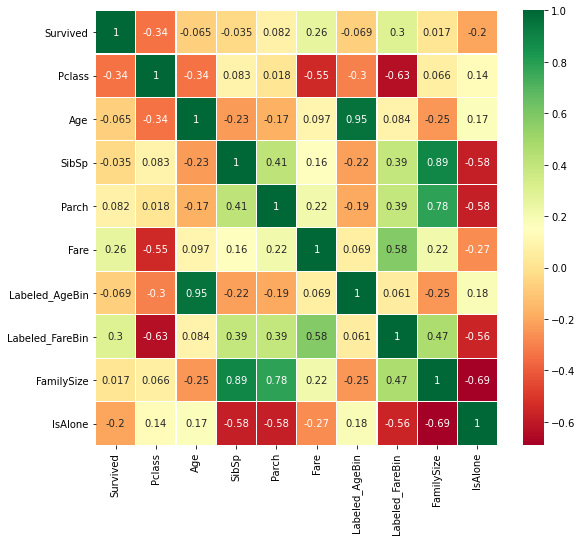

In [6]:
sb.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(9,8)
plt.show()

In [7]:
y = data['Survived']
data= data[['Pclass', 'Sex', 'Embarked', 'Labeled_AgeBin', 'Labeled_FareBin' , 'FamilySize', 'IsAlone']]

In [8]:
data = pd.get_dummies(data)
data

,Pclass,Labeled_AgeBin,Labeled_FareBin,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,2,0,0,1,0,0,1
1,1,2,3,2,0,1,0,1,0,0
2,3,1,1,1,1,1,0,0,0,1
3,1,2,3,2,0,1,0,0,0,1
4,3,2,1,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,2,1,1,1,0,1,0,0,1
887,1,1,2,1,1,1,0,0,0,1
888,3,2,2,4,0,1,0,0,0,1
889,1,1,2,1,1,0,1,1,0,0


In [31]:
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.25)
log_regression_alg = LogisticRegression()
log_regression_alg.fit(x_train, y_train)
test_predictions = log_regression_alg.predict(x_test)
precision, recall, _, _ = score(y_test, test_predictions, pos_label=1, average='binary')
accuracy = round((test_predictions==y_test).sum() / len(test_predictions),3)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), accuracy))

Precision: 0.805 / Recall: 0.75 / Accuracy: 0.83


In [32]:
prob_test_predictions =  log_regression_alg.predict_proba(x_test)
prob_test_predictions


array([[0.87761166, 0.12238834],
       [0.7024016 , 0.2975984 ],
       [0.81454767, 0.18545233],
       [0.07003339, 0.92996661],
       [0.8874641 , 0.1125359 ],
       [0.88819129, 0.11180871],
       [0.9236897 , 0.0763103 ],
       [0.74747826, 0.25252174],
       [0.15098704, 0.84901296],
       [0.43153915, 0.56846085],
       [0.90714444, 0.09285556],
       [0.93012812, 0.06987188],
       [0.42992628, 0.57007372],
       [0.19093295, 0.80906705],
       [0.19093295, 0.80906705],
       [0.32687961, 0.67312039],
       [0.21164745, 0.78835255],
       [0.85750246, 0.14249754],
       [0.19397756, 0.80602244],
       [0.84050251, 0.15949749],
       [0.88440504, 0.11559496],
       [0.8874641 , 0.1125359 ],
       [0.30880433, 0.69119567],
       [0.28487716, 0.71512284],
       [0.15702785, 0.84297215],
       [0.35601371, 0.64398629],
       [0.93012812, 0.06987188],
       [0.91037828, 0.08962172],
       [0.60061983, 0.39938017],
       [0.05772506, 0.94227494],
       [0.

In [33]:
prob_test_predictions =  log_regression_alg.predict_proba(x_test)[:,1]
bin_class_1 = (prob_test_predictions >=0.5).astype(int)


In [34]:
compare = (bin_class_1 == test_predictions).all()
compare


True

In [36]:
bin_class_2 = (prob_test_predictions >=0.3).astype(int)
precision, recall, _, _ = score(y_test, bin_class_2, pos_label=1, average='binary')
accuracy = round((bin_class_2==y_test).sum() / len(bin_class_2),3)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), accuracy))


Precision: 0.698 / Recall: 0.841 / Accuracy: 0.794
